<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/MENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,135])
print(data.shape)
dataLabels=np.array(data.columns)
print(dataLabels)
MENA=[]
MENA=['Algeria', 'Bahrain', 'Djibouti',' Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan','Kuwait', 'Lebanon',' Libya', 'Malta',' Morocco', 'Oman',' Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Palestine', 'Yemen','Ethiopia' ,' Sudan' ]

(181691, 19)
['iyear' 'imonth' 'iday' 'country_txt' 'region_txt' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'success' 'suicide' 'attacktype1_txt' 'targtype1_txt'
 'natlty1_txt' 'claimed' 'weapsubtype1_txt' 'nkillter' 'nwound' 'nwoundte']


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]
for c in range(data_C):
    Region_nums=[]
    Region_nums=data[dataLabels[c]].unique()
    Region_nums={Region_nums[i]: i for i in range(len(Region_nums))}
    Regions = Region_nums
    data[dataLabels[c]].replace(Regions, inplace=True)


For computational reasons, the best subset cannot be applied for any large n due to the 2n complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

In [0]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Initialization variables
X =data
X = X[['iyear', 'imonth' ,'iday', 'country_txt' ,'region_txt' ,'crit1' ,'crit2',
 'crit3', 'doubtterr', 'success', 'suicide' ,'attacktype1_txt' ,'targtype1_txt',
 'natlty1_txt', 'claimed' ,'weapsubtype1_txt' ,'nkillter', 'nwound' ,'nwoundte']].dropna()
Y = X.pop('country_txt')
k = 10
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [53]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,11)])
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['natlty1_txt'], 223595394.0),
 (2, ['natlty1_txt', 'iyear'], 212145147.0),
 (3, ['natlty1_txt', 'iyear', 'region_txt'], 211191002.0),
 (4, ['natlty1_txt', 'iyear', 'region_txt', 'suicide'], 210733531.0),
 (5,
  ['natlty1_txt', 'iyear', 'region_txt', 'suicide', 'claimed'],
  210254862.0),
 (6,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt'],
  209997011.0),
 (7,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte'],
  209766416.0),
 (8,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr'],
  209556180.0),
 (9,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr',
   'nwound'],
  209341701.0),
 (10,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr',


In [50]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[natlty1_txt],2.235954e+08,0.213211,1,1230.648169,1.068797,1.068853,0.213206
2,"[natlty1_txt, iyear]",2.121451e+08,0.253502,2,1167.640404,1.014076,1.014187,0.253494
3,"[natlty1_txt, iyear, region_txt]",2.111910e+08,0.256859,3,1162.401608,1.009526,1.009693,0.256847
4,"[natlty1_txt, iyear, region_txt, suicide]",2.107335e+08,0.258469,4,1159.896429,1.007351,1.007573,0.258453
5,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.102549e+08,0.260153,5,1157.274584,1.005074,1.005352,0.260133
6,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.099970e+08,0.261061,6,1155.868082,1.003852,1.004186,0.261036
7,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.097664e+08,0.261872,7,1154.611598,1.002761,1.003150,0.261844
8,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.095562e+08,0.262612,8,1153.467165,1.001767,1.002212,0.262580
9,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.093417e+08,0.263367,9,1152.299382,1.000753,1.001253,0.263330
10,"[natlty1_txt, iyear, region_txt, suicide, clai...",2.091911e+08,0.263896,10,1151.483434,1.000044,1.000600,0.263856


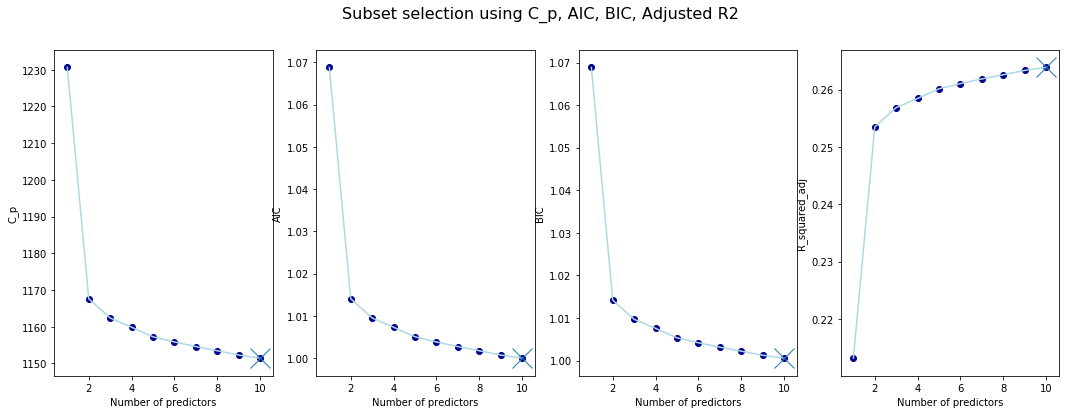

In [52]:

import matplotlib.pyplot as plt

variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()


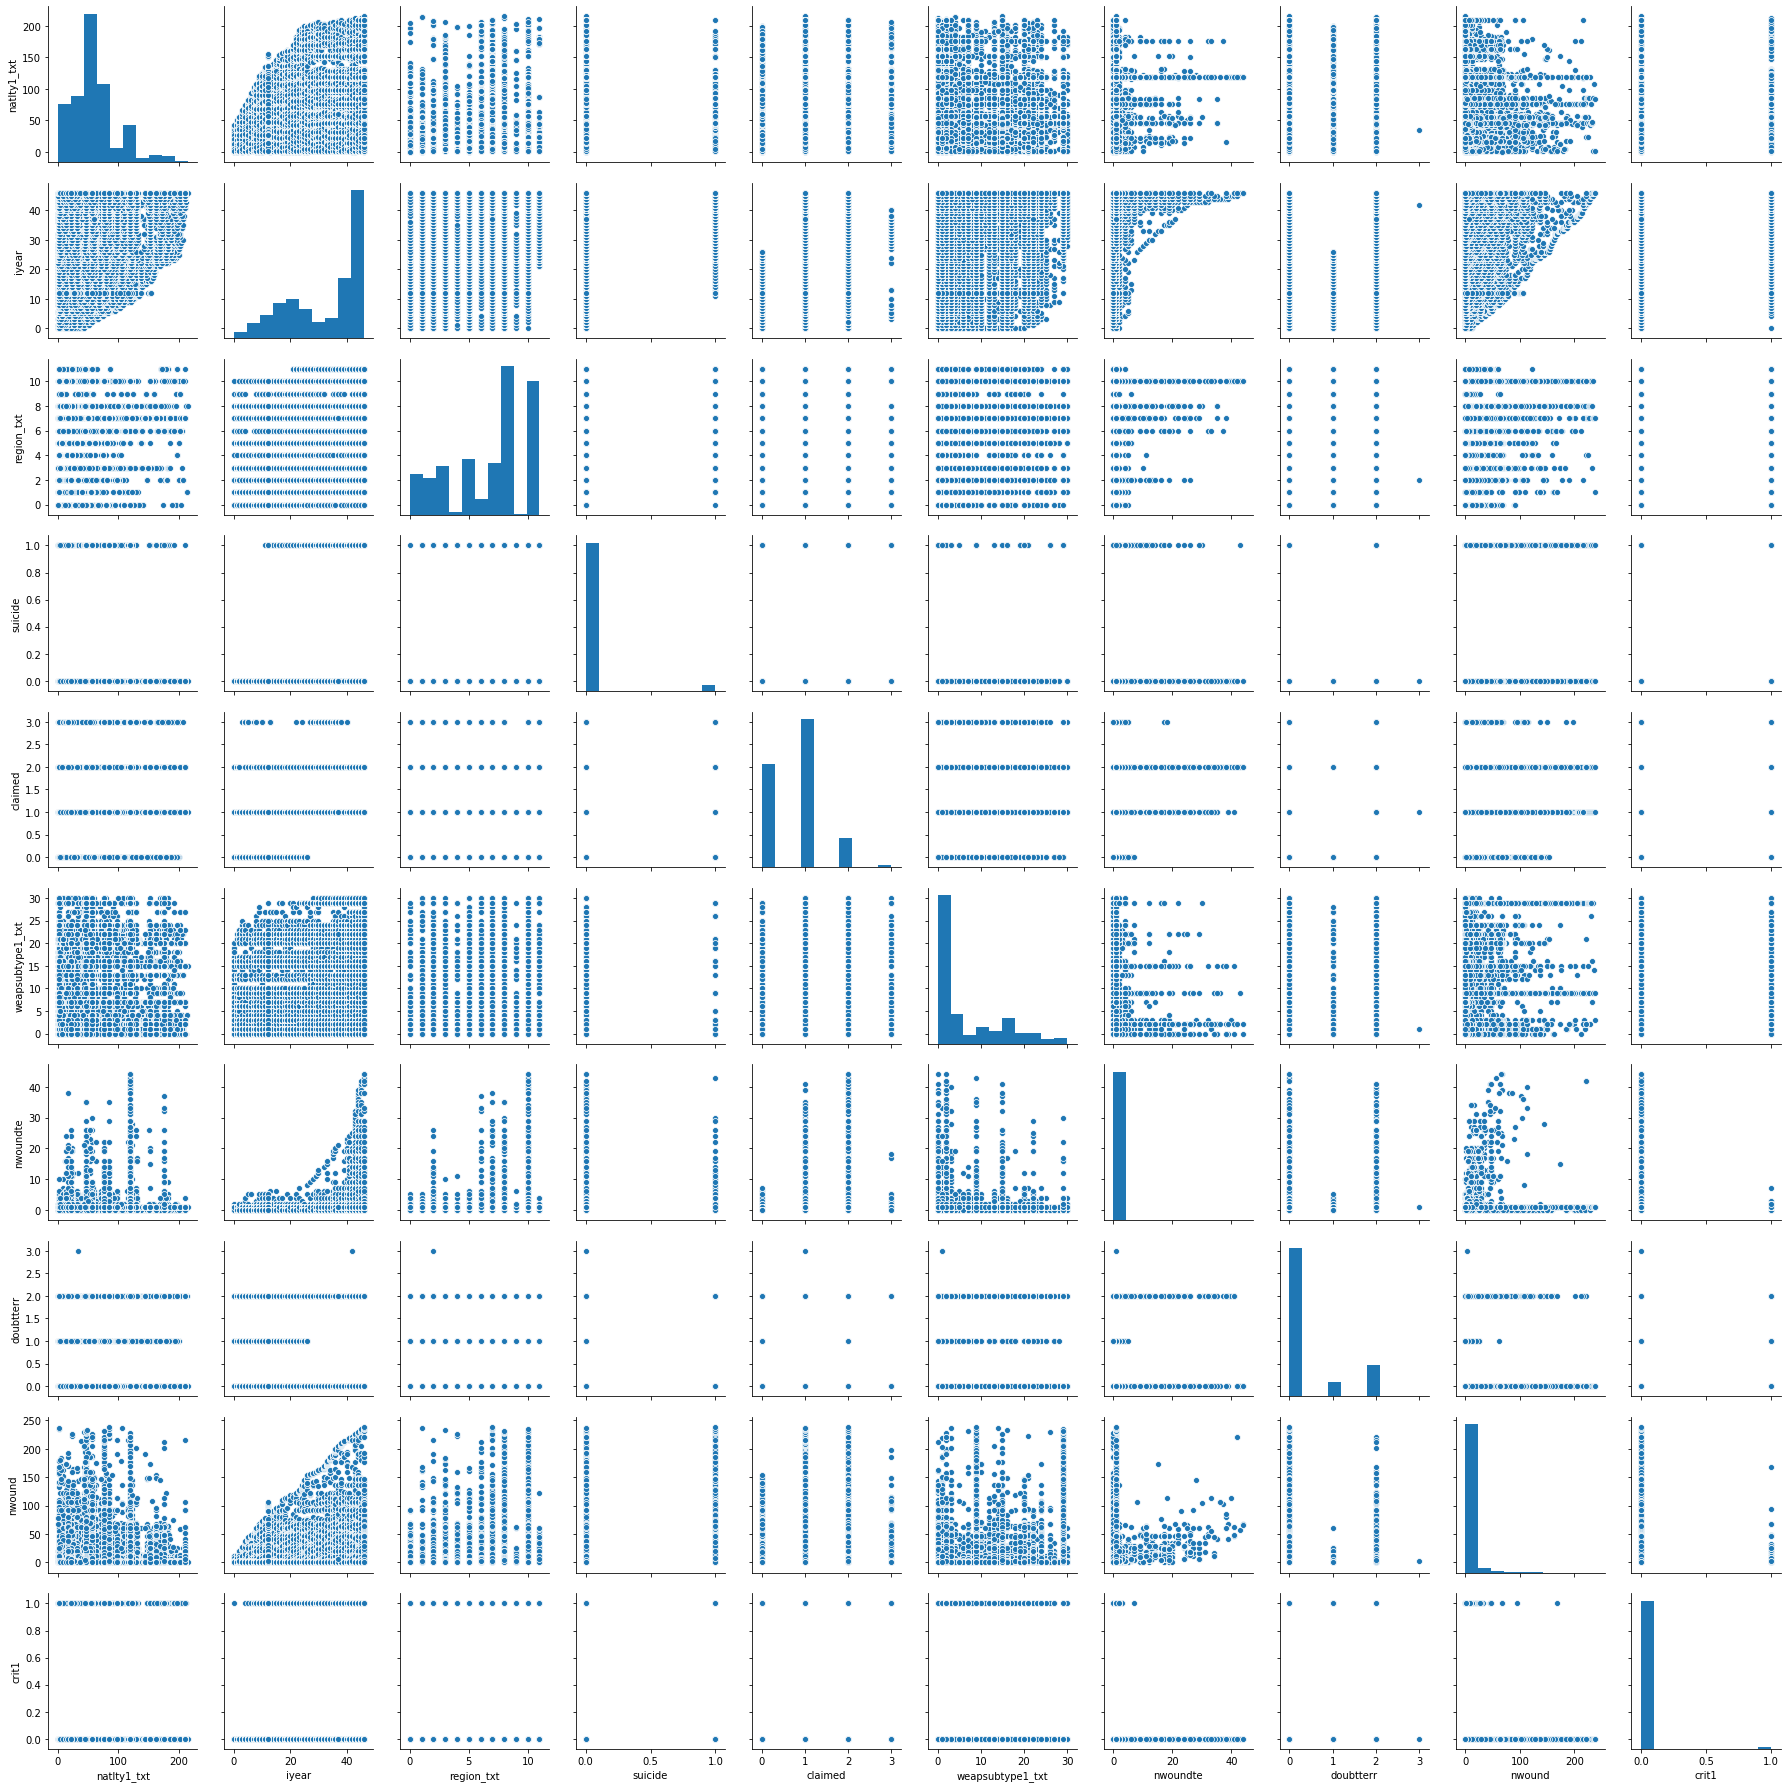

In [59]:
import seaborn as sns

sns.pairplot(X[['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr',
   'nwound',
   'crit1']]);
